In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
np.set_printoptions(suppress=True)#不输出科学计数法
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False #显示中文和正负号
%config InlineBackend.figure_format='svg' #增加清晰度
from pandas import DataFrame,Series
#设定绘图风格
plt.style.use('ggplot')

In [6]:
df=pd.read_csv(r'D:\notebook\data20200206\contb_02.csv')
df.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11
1,"Obama, Barack","PIZZI, JULIA",NY,DEWEY & LEBOEUF,ATTORNEY,100.0,14-SEP-11
2,"Obama, Barack","LEHRER, RANDY",NY,SELF-EMPLOYED,PSYCHOTHERAPIST,10.0,04-JUL-11
3,"Obama, Barack","MARKS, ELIZABETH",NY,MATTHEW MARKS GALLERY,DIRECTOR ART GALLERY,150.0,30-SEP-11
4,"Obama, Barack","GELB, DANIEL",NY,SOUTH BEACH PSYCHIATRIC CENTER,SOCIAL WORKER,150.0,04-AUG-11


In [4]:
c2=pd.read_csv(r'D:\notebook\data20200206\contb_01.csv')
c2.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,250.0,20-JUN-11
1,"Bachmann, Michelle","HARVEY, WILLIAM",AL,RETIRED,RETIRED,50.0,23-JUN-11
2,"Bachmann, Michelle","SMITH, LANIER",AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11
3,"Bachmann, Michelle","BLEVINS, DARONDA",AR,NONE,RETIRED,250.0,01-AUG-11
4,"Bachmann, Michelle","WARDENBURG, HAROLD",AR,NONE,RETIRED,300.0,20-JUN-11


In [9]:
c3=pd.read_csv(r'D:\notebook\data20200206\contb_03.csv')
c3

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Perry, Rick","NORRIS, BOBBY",TX,SELF,REALTOR/ RANCHER,1000.0,14-DEC-11
1,"Perry, Rick","HUNT, CAROLINE",TX,HOMEMAKER,HOMEMAKER,2500.0,14-DEC-11
2,"Perry, Rick","ROBINOWITZ, DALE",TX,SELF-EMPLOYED,DENTIST,2500.0,14-DEC-11
3,"Perry, Rick","ZUNIGA, DAVID & SYLVIA",TX,DAVID M. ZUNIGA PE,OWNER,250.0,14-DEC-11
4,"Perry, Rick","FOSTER, GLENNA",TX,SELF,INVESTOR/ CONSULTANT,1500.0,14-DEC-11
...,...,...,...,...,...,...,...
1726,"Perry, Rick","GORMAN, CHRIS D. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11
1727,"Perry, Rick","DUFFY, DAVID A. MR.",XX,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11
1728,"Perry, Rick","GRANE, BRYAN F. MR.",XX,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11
1729,"Perry, Rick","TOLBERT, DARYL MR.",XX,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11


## 数据的预处理（nan，时间序列，基本的统计描述）

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 7 columns):
cand_nm              500001 non-null object
contbr_nm            500001 non-null object
contbr_st            500001 non-null object
contbr_employer      490448 non-null object
contbr_occupation    495774 non-null object
contb_receipt_amt    500001 non-null float64
contb_receipt_dt     500001 non-null object
dtypes: float64(1), object(6)
memory usage: 26.7+ MB


### 只选取这些内容进行分析
#cand_nm竞选人
  #contbr_nm 献金人
  #contbr_st 献金人州
  #contbr_employer捐赠人所在公司
  #contbr_occupation捐赠人职业
  #contb_receipt_amt捐赠数额
  #contb_receipt_dt捐赠日期

In [8]:
# pd.to_datetime(df['contb_receipt_dt']) #这里其实可以直接将object转换成时间格式 但是为了后续的计算这个暂时不用

In [10]:
df=df[['cand_nm','contbr_nm','contbr_st','contbr_employer',
      'contbr_occupation','contb_receipt_amt','contb_receipt_dt']] #切片以传入列表方式将题目需要的列给提取出来
df.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt
0,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11
1,"Obama, Barack","PIZZI, JULIA",NY,DEWEY & LEBOEUF,ATTORNEY,100.0,14-SEP-11
2,"Obama, Barack","LEHRER, RANDY",NY,SELF-EMPLOYED,PSYCHOTHERAPIST,10.0,04-JUL-11
3,"Obama, Barack","MARKS, ELIZABETH",NY,MATTHEW MARKS GALLERY,DIRECTOR ART GALLERY,150.0,30-SEP-11
4,"Obama, Barack","GELB, DANIEL",NY,SOUTH BEACH PSYCHIATRIC CENTER,SOCIAL WORKER,150.0,04-AUG-11


## 用用统计学数据 快速描述数据类型种类describe（）

In [5]:
df.describe()

,contb_receipt_amt
count,500001.000000
mean,240.417336
std,560.771601
min,-5115.000000
25%,35.000000
50%,100.000000
75%,250.000000
max,25000.000000


## 因为保密原因，要把空值填充尾 NOT PROVIDED

In [27]:
df.fillna(value='NOT PROVIDED',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 8 columns):
cand_nm              500001 non-null object
contbr_nm            500001 non-null object
contbr_st            500001 non-null object
contbr_employer      500001 non-null object
contbr_occupation    500001 non-null object
contb_receipt_amt    500001 non-null float64
contb_receipt_dt     500001 non-null object
parties              500001 non-null object
dtypes: float64(1), object(7)
memory usage: 30.5+ MB


## 异常值处理，对捐赠金额小于零的数据删除处理

In [36]:
df['contb_receipt_amt']<=0 #得出布尔值 索引布尔值得出需求值

0         False
1         False
2         False
3         False
4         False
          ...  
499996    False
499997    False
499998    False
499999    False
500000    False
Name: contb_receipt_amt, Length: 495156, dtype: bool

In [37]:
df=df.loc[~(df['contb_receipt_amt']<=0)] #取反
df.head(5)

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
0,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11,Democrat
1,"Obama, Barack","PIZZI, JULIA",NY,DEWEY & LEBOEUF,ATTORNEY,100.0,14-SEP-11,Democrat
2,"Obama, Barack","LEHRER, RANDY",NY,SELF-EMPLOYED,PSYCHOTHERAPIST,10.0,04-JUL-11,Democrat
3,"Obama, Barack","MARKS, ELIZABETH",NY,MATTHEW MARKS GALLERY,DIRECTOR ART GALLERY,150.0,30-SEP-11,Democrat
4,"Obama, Barack","GELB, DANIEL",NY,SOUTH BEACH PSYCHIATRIC CENTER,SOCIAL WORKER,150.0,04-AUG-11,Democrat


In [54]:
# df['contb_receipt_dt']=pd.to_datetime(df['contb_receipt_dt']) #可以直接转换格式 就不用拆分时间格式那么麻烦了

## 新建一列，各个候选人所在的党派

In [40]:
#共有多少不同的候选人
df['cand_nm'].unique()
# df['cand_nm'].nunique() #对去重后的数据进行计数 因为得出的是array格式无法直接用count（）来计数

array(['Obama, Barack', "Roemer, Charles E. 'Buddy' III",
       'Pawlenty, Timothy', 'Johnson, Gary Earl', 'Paul, Ron',
       'Santorum, Rick', 'Cain, Herman', 'Gingrich, Newt',
       'Bachmann, Michelle', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [41]:
#用到映射
parties = {
  'Bachmann, Michelle': 'Republican',
  'Romney, Mitt': 'Republican',
  'Obama, Barack': 'Democrat',
  "Roemer, Charles E. 'Buddy' III": 'Reform',
  'Pawlenty, Timothy': 'Republican',
  'Johnson, Gary Earl': 'Libertarian',
  'Paul, Ron': 'Republican',
  'Santorum, Rick': 'Republican',
  'Cain, Herman': 'Republican',
  'Gingrich, Newt': 'Republican',
  'McCotter, Thaddeus G': 'Republican',
  'Huntsman, Jon': 'Republican',
  'Perry, Rick': 'Republican'           
 }

In [42]:
df['cand_nm'].map(parties)

0           Democrat
1           Democrat
2           Democrat
3           Democrat
4           Democrat
             ...    
499996    Republican
499997    Republican
499998    Republican
499999    Republican
500000    Republican
Name: cand_nm, Length: 495156, dtype: object

In [43]:
df['parties']=df['cand_nm'].map(parties)

In [44]:
df.head()

,cand_nm,contbr_nm,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,parties
0,"Obama, Barack","THOMAS, MAMIE ETHEL",NY,RETIRED,RETIRED,200.0,30-SEP-11,Democrat
1,"Obama, Barack","PIZZI, JULIA",NY,DEWEY & LEBOEUF,ATTORNEY,100.0,14-SEP-11,Democrat
2,"Obama, Barack","LEHRER, RANDY",NY,SELF-EMPLOYED,PSYCHOTHERAPIST,10.0,04-JUL-11,Democrat
3,"Obama, Barack","MARKS, ELIZABETH",NY,MATTHEW MARKS GALLERY,DIRECTOR ART GALLERY,150.0,30-SEP-11,Democrat
4,"Obama, Barack","GELB, DANIEL",NY,SOUTH BEACH PSYCHIATRIC CENTER,SOCIAL WORKER,150.0,04-AUG-11,Democrat


## 查看parties这一列中有哪些不同的元素，并统计parties中元素出现的次数

In [16]:
df['parties'].unique()

array(['Democrat', 'Reform', 'Republican', 'Libertarian'], dtype=object)

In [17]:
df['parties'].count() #发现不对

500001

In [45]:
df['parties'].value_counts()  #value_counts()就是用来统计series里面不同项目的个数汇总

Republican     288169
Democrat       199909
Reform           5844
Libertarian      1234
Name: parties, dtype: int64

## 查看各个党派收到的政治献金的总数

In [24]:
#先用透视表来表达分组
pd.pivot_table(df,values='contb_receipt_amt',index='parties',aggfunc='sum')

,contb_receipt_amt
parties,
Democrat,4.170916e+07
Libertarian,5.669616e+05
Reform,3.674575e+05
Republican,7.756533e+07


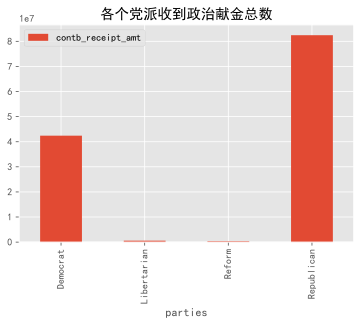

In [46]:
pd.pivot_table(df,values='contb_receipt_amt',index='parties',aggfunc='sum').plot(kind='bar',title='各个党派收到政治献金总数')

- 可以看出共和党的接收政治献金比民主党多出将近一倍，很可能赢得大选

In [52]:
#groupby的方法
df.groupby(by='parties')['contb_receipt_amt'].sum().apply(lambda x: '%.2f' % x).astype('float') 
#科学计数法不太容易看，可以适当调整保留两位小数的浮点类型

parties
Democrat       42408027.85
Libertarian      566961.60
Reform           373009.90
Republican     82443227.51
Name: contb_receipt_amt, dtype: float64

## 查看每天每个党派收到的钱钱的总数

In [58]:
#对时间和党派进行分组
df.groupby(by=['contb_receipt_dt','parties'])['contb_receipt_amt'].sum()

contb_receipt_dt  parties    
01-APR-11         Reform             50.00
                  Republican      12635.00
01-APR-12         Democrat        65569.22
                  Libertarian       625.00
                  Republican      56939.32
                                   ...    
31-MAY-11         Republican     115659.80
31-OCT-11         Democrat        41834.12
                  Libertarian      4250.00
                  Reform           3205.00
                  Republican     300105.93
Name: contb_receipt_amt, Length: 1549, dtype: float64

In [59]:
#先用透视表来表达分组
pd.pivot_table(df,values='contb_receipt_amt',index=['contb_receipt_dt','parties'],aggfunc='sum')

contb_receipt_amt
contb_receipt_dt parties                       
01-APR-11        Reform                   50.00
                 Republican            12635.00
01-APR-12        Democrat              65569.22
                 Libertarian             625.00
                 Republican            56939.32
...                                         ...
31-MAY-11        Republican           115659.80
31-OCT-11        Democrat              41834.12
                 Libertarian            4250.00
                 Reform                 3205.00
                 Republican           300105.93

[1549 rows x 1 columns]

## 将原始数据中的时间格式改成yy-mm-dd （拆分思维的运用）

In [66]:
months = {'JAN' : 1, 'FEB' : 2, 'MAR' : 3, 'APR' : 4, 'MAY' : 5, 'JUN' : 6,
          'JUL' : 7, 'AUG' : 8, 'SEP' : 9, 'OCT': 10, 'NOV': 11, 'DEC' : 12}

In [61]:
months['SEP']

9

In [70]:
def function(s):
    day,month,year=s.split('-')   #因为显示的数据是数字和英文，不能改变列细节的情况下只能想到拆分
    month = months[month]        #month里面是sep这些英文，带入字典会返回相应的int数字对应相应的月份
    return '20'+year+'-'+str(month)+'-'+day #因为字典里的数字是int 而初始时间序列里的数据是object，需要改格式
#return 返回拼接的字符串
# 过程就是将自变量 s拆分，比如30-SEP-11 以‘-’号拆分，返回 字符串模式的拼接 

In [72]:
df['contb_receipt_dt'].map(function)

0          2011-9-30
1          2011-9-14
2          2011-7-04
3          2011-9-30
4          2011-8-04
             ...    
499996    2011-12-13
499997    2011-12-13
499998    2011-12-14
499999    2011-12-14
500000    2011-12-14
Name: contb_receipt_dt, Length: 495156, dtype: object

In [73]:
pd.to_datetime(df['contb_receipt_dt']) #这道题其实可以直接用pd。to_datetime来完成，前者提供另外的思路也是可以的

0        2011-09-30
1        2011-09-14
2        2011-07-04
3        2011-09-30
4        2011-08-04
            ...    
499996   2011-12-13
499997   2011-12-13
499998   2011-12-14
499999   2011-12-14
500000   2011-12-14
Name: contb_receipt_dt, Length: 495156, dtype: datetime64[ns]

- ***最后将这行覆盖，就能得到具体的时间数据 用df看就行了
- ***df['contb_receipt_dt']=df['contb_receipt_dt'].map(transform_date)

## 查看老兵（Disabled Veteran）这个职业支持谁


In [75]:
df['contbr_occupation']=='DISABLED VETERAN'

0         False
1         False
2         False
3         False
4         False
          ...  
499996    False
499997    False
499998    False
499999    False
500000    False
Name: contbr_occupation, Length: 495156, dtype: bool

In [76]:
df5=df.loc[df['contbr_occupation']=='DISABLED VETERAN']

In [77]:
df5.groupby(by='cand_nm').aggregate({'contb_receipt_amt':'sum'}).sort_values('contb_receipt_amt',ascending=False)

,contb_receipt_amt
cand_nm,
"Paul, Ron",4439.1
"Obama, Barack",1585.0
"Santorum, Rick",550.0
"Cain, Herman",300.0
"Gingrich, Newt",250.0
"Roemer, Charles E. 'Buddy' III",100.0


- 对老兵支持者的数据进行可视化处理

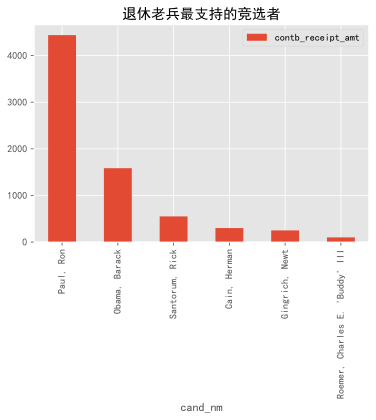

In [79]:
df5.groupby(by='cand_nm')['contb_receipt_amt'].sum().sort_values(ascending=False).plot(kind='bar',title='退休老兵最支持的竞选者')
plt.legend()

## 找出各个候选人捐赠金额最大的职业，以及捐赠数额

In [43]:
s=df.groupby(by=['cand_nm']).aggregate({'contb_receipt_amt':'max'})#选出候选人和接受献金的最大金额的合并表
s                                                               #然后塞入原表 关联一对一对应的职业从而展示

,contb_receipt_amt
cand_nm,
"Bachmann, Michelle",5000.0
"Cain, Herman",10000.0
"Gingrich, Newt",5100.0
"Huntsman, Jon",5000.0
"Johnson, Gary Earl",2500.0
"McCotter, Thaddeus G",4000.0
"Obama, Barack",7000.0
"Paul, Ron",25000.0
"Pawlenty, Timothy",10000.0


In [40]:
for i in range(s.size):#s.size就是返回矩阵中元素的个数，等于是将矩阵中的数据一一遍历
    ex='cand_nm=="%s" & contb_receipt_amt==%s'%(s.index[i],s.values[i])
# cand中的值等于%s中的值且等于amt列中的相对应的值“”这里面的相对应的函数%表示就是s.index[i]
#s矩阵中的索引i遍历，因为i in range（s.size）,因为用的是同一个i所以数据是一一对应的。这样带入df的ex才能一致
#比如 in range（5）就是在 【1,2,3,4,5】中的数据，一个个取出来
    print(ex)
    #display(df.query(ex))

cand_nm=="Bachmann, Michelle" & contb_receipt_amt==[5000.]
cand_nm=="Cain, Herman" & contb_receipt_amt==[10000.]
cand_nm=="Gingrich, Newt" & contb_receipt_amt==[5100.]
cand_nm=="Huntsman, Jon" & contb_receipt_amt==[5000.]
cand_nm=="Johnson, Gary Earl" & contb_receipt_amt==[2500.]
cand_nm=="McCotter, Thaddeus G" & contb_receipt_amt==[4000.]
cand_nm=="Obama, Barack" & contb_receipt_amt==[7000.]
cand_nm=="Paul, Ron" & contb_receipt_amt==[25000.]
cand_nm=="Pawlenty, Timothy" & contb_receipt_amt==[10000.]
cand_nm=="Perry, Rick" & contb_receipt_amt==[10000.]
cand_nm=="Roemer, Charles E. 'Buddy' III" & contb_receipt_amt==[200.]
cand_nm=="Santorum, Rick" & contb_receipt_amt==[10000.]
